# Label Distribution Analysis

In this section, we will analyze and visualize the overall distribution of labels in the dataset using bar plots.

In [1]:
import pandas as pd
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
# Set the current working directory to the project root
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
os.chdir(ROOT_DIR)

In [2]:
df = pd.read_parquet('data/processed/phase0_baseline.parquet')

df.head()

,id,text,narratives,subnarratives,language,narrative_ids,subnarrative_ids
0,BG_670.txt,Опитът на колективния Запад да „обезкърви Руси...,[URW: Blaming the war on others rather than th...,[URW: Blaming the war on others rather than th...,BG,"[11, 12, 14]","[88, 70, 74, 86]"
1,A7_URW_BG_4793.txt,"Цончо Ганев, “Възраждане”: Обещали сме на Укра...",[URW: Discrediting Ukraine],[URW: Discrediting Ukraine: Situation in Ukrai...,BG,[13],[81]
2,BG_3245.txt,Подкрепата за Киев от страна на Запада вече не...,"[URW: Discrediting the West, Diplomacy, URW: D...","[URW: Discrediting the West, Diplomacy: The We...",BG,"[13, 14]","[81, 90, 87]"
3,A9_BG_5190.txt,"Дмитрий Медведев: НПО-та, спонсорирани от Соро...","[URW: Discrediting the West, Diplomacy, URW: D...","[URW: Discrediting the West, Diplomacy: Other,...",BG,"[13, 14]","[84, 86]"
4,A9_BG_3379.txt,Британски дипломат обвини Запада за украинския...,"[URW: Discrediting the West, Diplomacy, URW: P...","[URW: Discrediting the West, Diplomacy: Other,...",BG,"[19, 14]","[86, 103]"


In [3]:
import numpy as np

# Inspect the type and content of the first few entries in 'narratives' and 'subnarratives'
print('narratives column:')
print(df['narratives'].head())
print('Type of first entry:', type(df['narratives'].iloc[0]))
print('\nsubnarratives column:')
print(df['subnarratives'].head())
print('Type of first entry:', type(df['subnarratives'].iloc[0]))

# If any entry in 'narratives' or 'subnarratives' is a numpy array, convert the entire column to lists

df['narratives'] = df['narratives'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)
df['subnarratives'] = df['subnarratives'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)
df['narrative_ids'] = df['narrative_ids'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)
df['subnarrative_ids'] = df['subnarrative_ids'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)

narratives column:
0    [URW: Blaming the war on others rather than th...
1                          [URW: Discrediting Ukraine]
2    [URW: Discrediting the West, Diplomacy, URW: D...
3    [URW: Discrediting the West, Diplomacy, URW: D...
4    [URW: Discrediting the West, Diplomacy, URW: P...
Name: narratives, dtype: object
Type of first entry: <class 'numpy.ndarray'>

subnarratives column:
0    [URW: Blaming the war on others rather than th...
1    [URW: Discrediting Ukraine: Situation in Ukrai...
2    [URW: Discrediting the West, Diplomacy: The We...
3    [URW: Discrediting the West, Diplomacy: Other,...
4    [URW: Discrediting the West, Diplomacy: Other,...
Name: subnarratives, dtype: object
Type of first entry: <class 'numpy.ndarray'>


# Narrative and subnarrative distribution

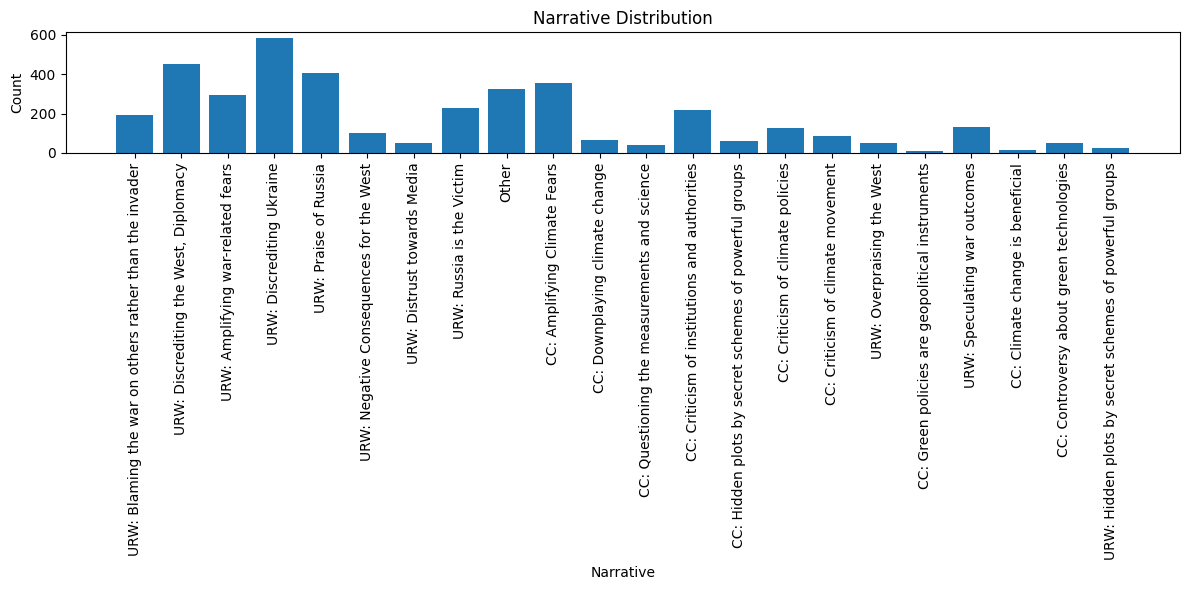

/tmp/ipykernel_1139/344610218.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


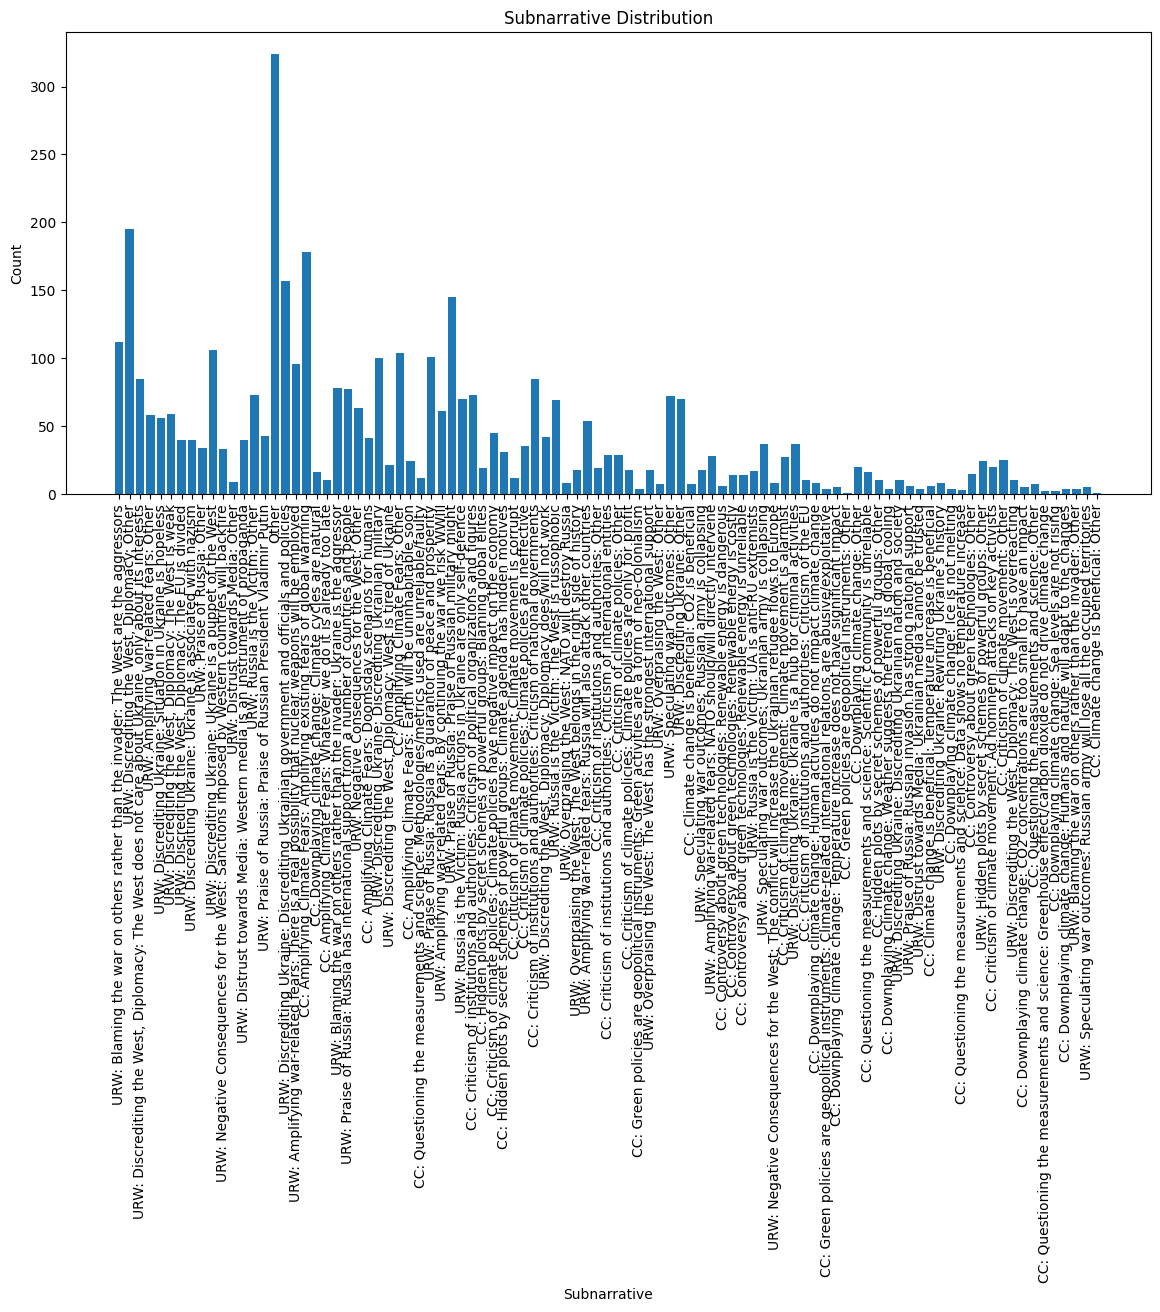

In [4]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten and count narratives
narratives_flat = [narr for sublist in df['narratives'] for narr in (sublist.tolist() if hasattr(sublist, 'tolist') else list(sublist))]
narrative_counts = Counter(narratives_flat)

plt.figure(figsize=(12, 6))
plt.bar(list(narrative_counts.keys()), list(narrative_counts.values()))
plt.xticks(rotation=90)
plt.title('Narrative Distribution')
plt.xlabel('Narrative')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Flatten and count subnarratives
subnarratives_flat = [subnarr for sublist in df['subnarratives'] for subnarr in (sublist.tolist() if hasattr(sublist, 'tolist') else list(sublist))]
subnarrative_counts = Counter(subnarratives_flat)

plt.figure(figsize=(14, 6))
plt.bar(list(subnarrative_counts.keys()), list(subnarrative_counts.values()))
plt.xticks(rotation=90)
plt.title('Subnarrative Distribution')
plt.xlabel('Subnarrative')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Number of documents with a certain number of labels

In [5]:
df['num_narratives'] = df['narratives'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df['num_subnarratives'] = df['subnarratives'].apply(lambda x: len(x) if isinstance(x, list) else 0)


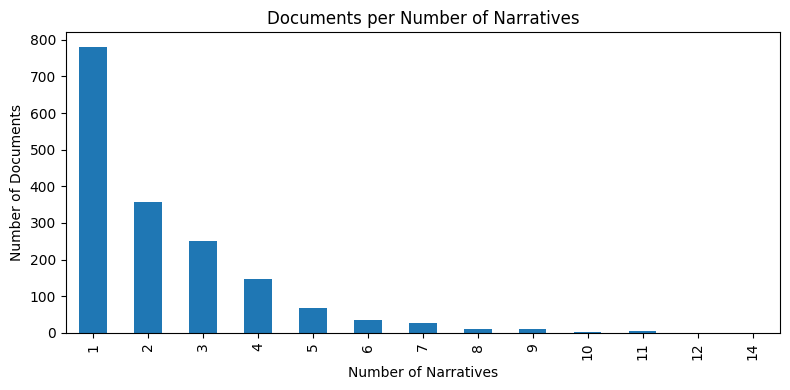

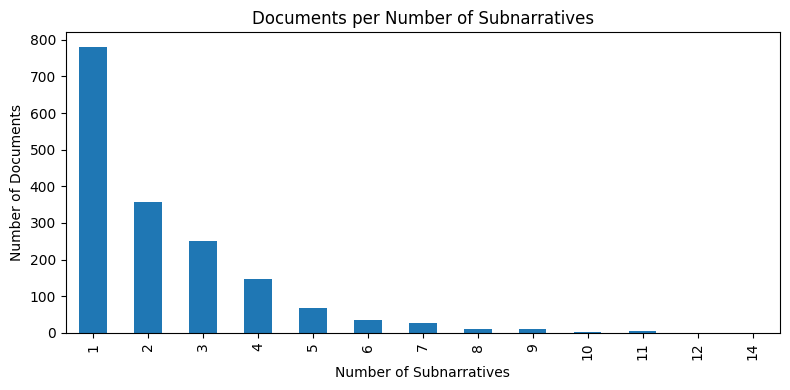

In [6]:
# Plot number of documents per number of narratives
plt.figure(figsize=(8, 4))
df['num_narratives'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Narratives')
plt.ylabel('Number of Documents')
plt.title('Documents per Number of Narratives')
plt.tight_layout()
plt.show()

# Plot number of documents per number of subnarratives
plt.figure(figsize=(8, 4))
df['num_subnarratives'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Subnarratives')
plt.ylabel('Number of Documents')
plt.title('Documents per Number of Subnarratives')
plt.tight_layout()
plt.show()

# Number of documents per language

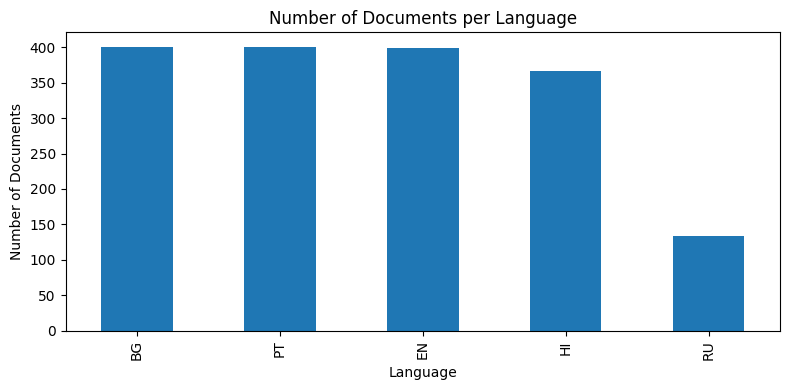

In [7]:
languge_documents_counts = df['language'].value_counts()
plt.figure(figsize=(8, 4))
languge_documents_counts.plot(kind='bar')
plt.xlabel('Language')
plt.ylabel('Number of Documents')
plt.title('Number of Documents per Language')
plt.tight_layout()
plt.show()

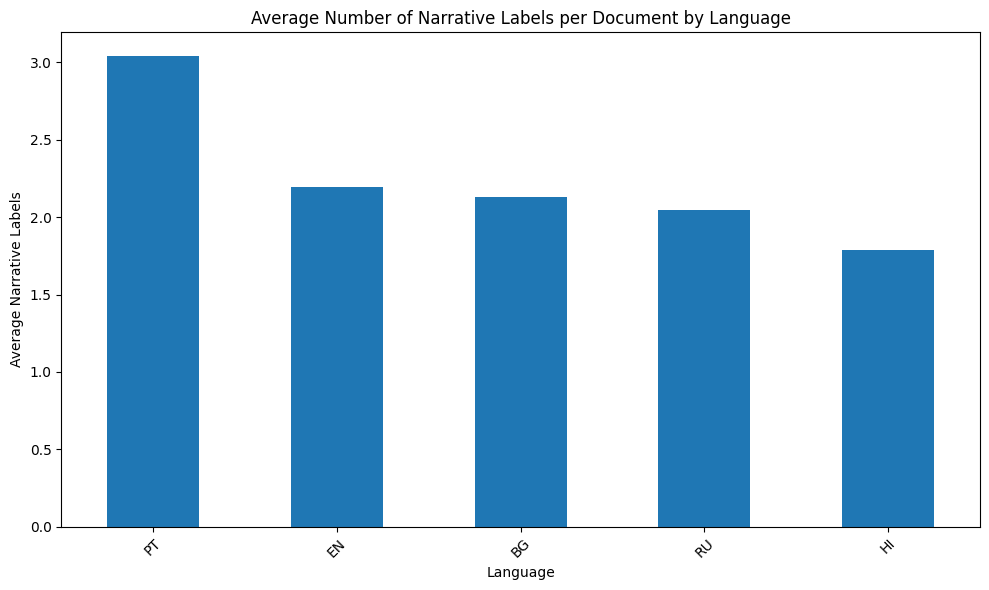

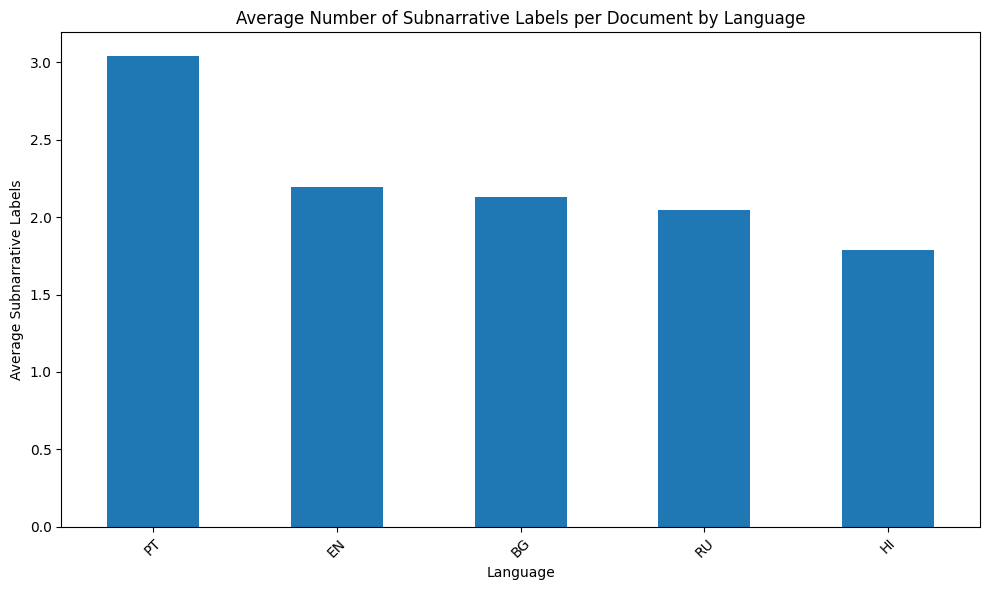

In [8]:
avg_narr_labels_by_lang = df.groupby('language')['num_narratives'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_narr_labels_by_lang.plot(kind='bar')
plt.title('Average Number of Narrative Labels per Document by Language')
plt.xlabel('Language')
plt.ylabel('Average Narrative Labels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

avg_subnarr_labels_by_lang = df.groupby('language')['num_subnarratives'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_subnarr_labels_by_lang.plot(kind='bar')
plt.title('Average Number of Subnarrative Labels per Document by Language')
plt.xlabel('Language')
plt.ylabel('Average Subnarrative Labels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Labels distribution per language



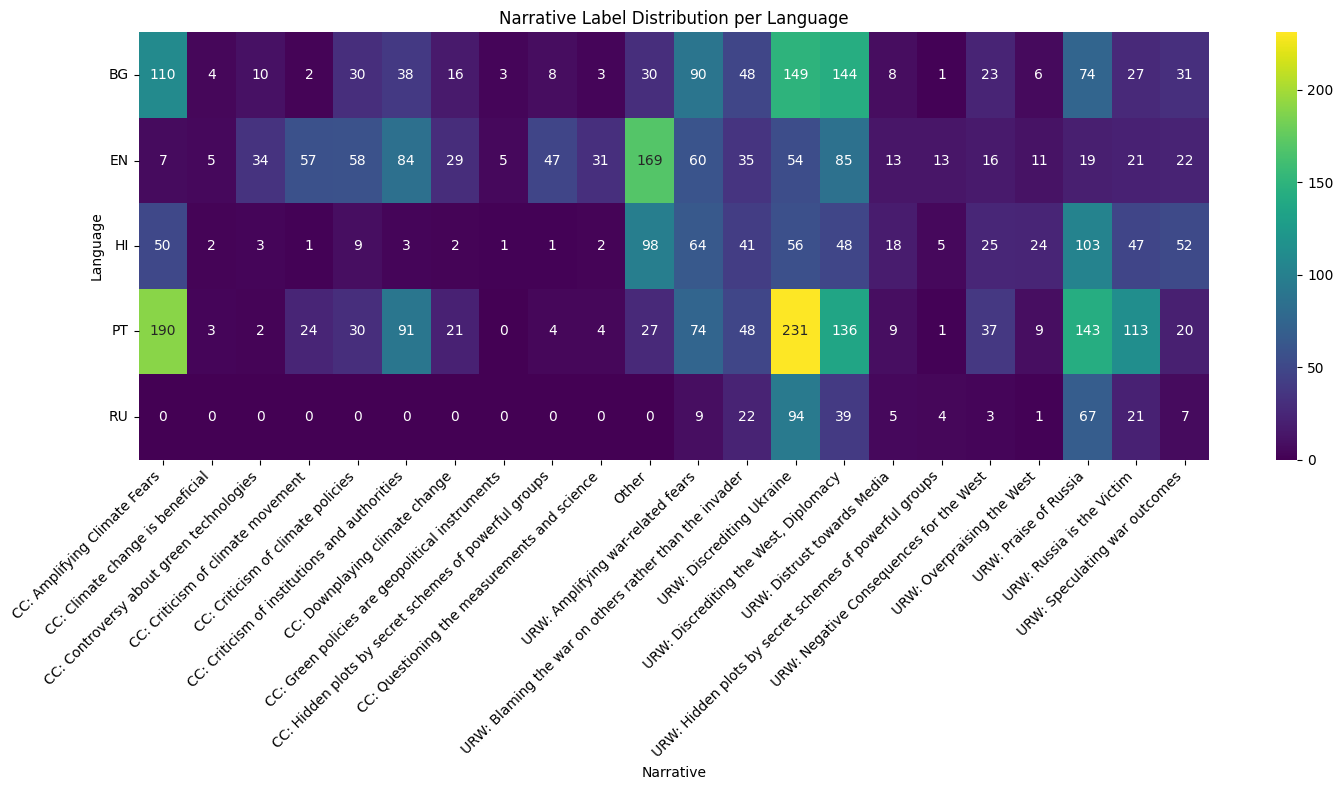

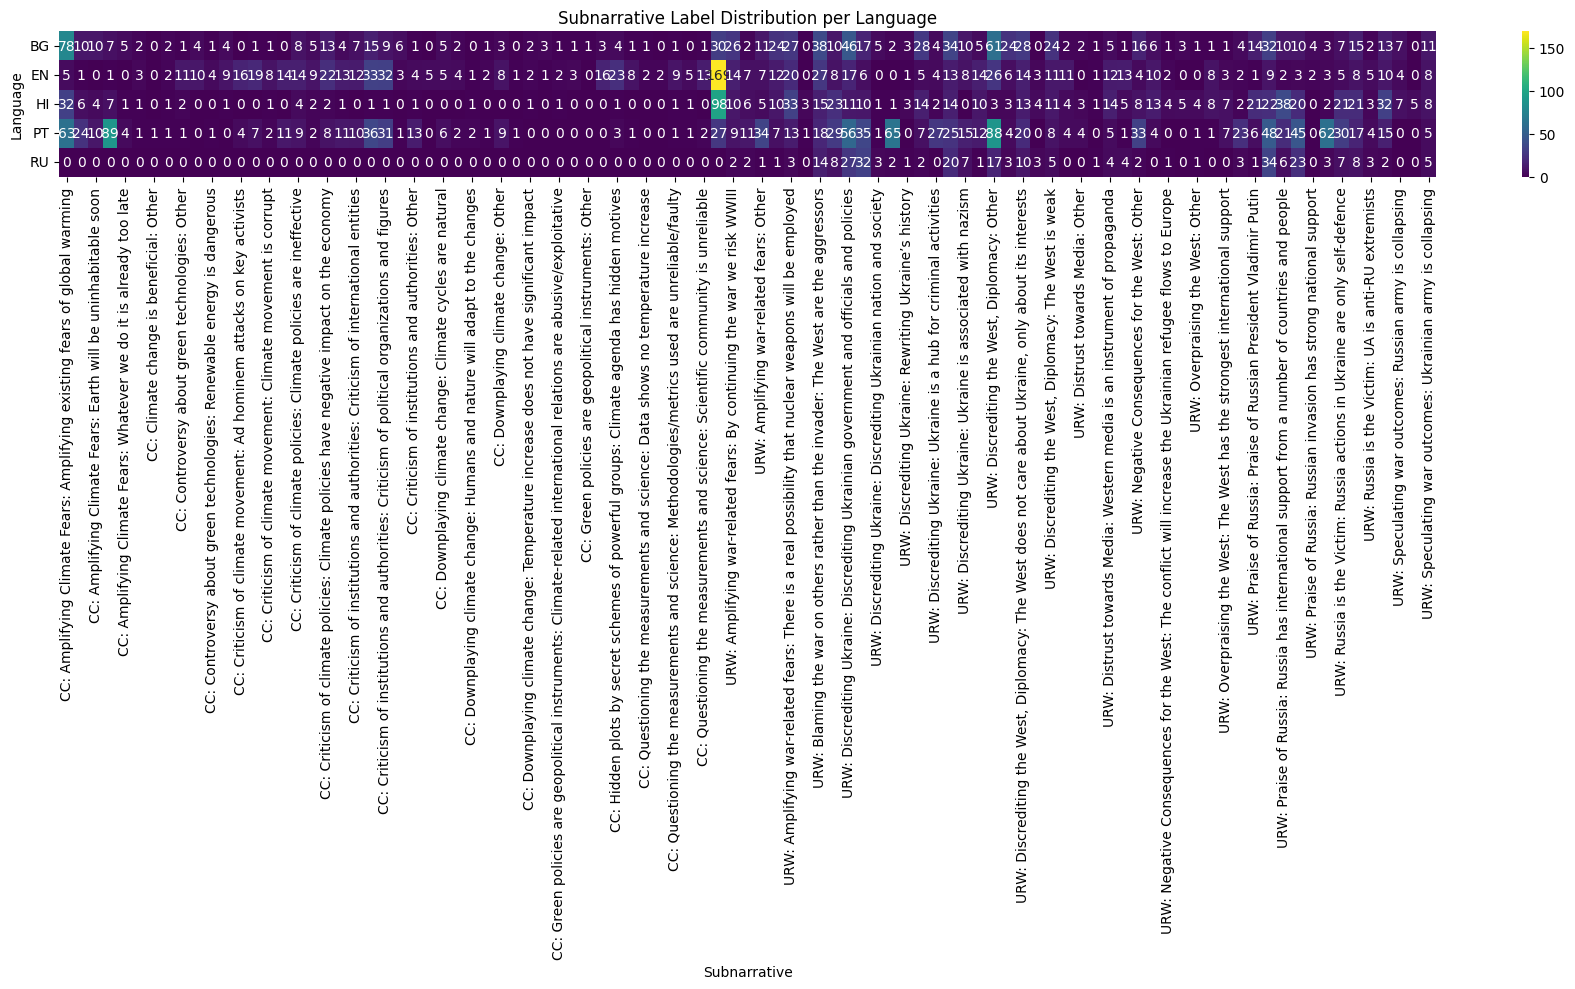

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt

# Explode narratives and subnarratives to have one row per label per document
df_exploded_narratives = df.explode('narratives')
df_exploded_subnarratives = df.explode('subnarratives')

# Calculate narrative label distribution per language
narrative_lang_dist = pd.crosstab(df_exploded_narratives['language'], df_exploded_narratives['narratives'])

# Calculate subnarrative label distribution per language
subnarrative_lang_dist = pd.crosstab(df_exploded_subnarratives['language'], df_exploded_subnarratives['subnarratives'])

# Plot heatmap for narratives
plt.figure(figsize=(15, 8))
sns.heatmap(narrative_lang_dist, annot=True, fmt="d", cmap="viridis")
plt.title('Narrative Label Distribution per Language')
plt.ylabel('Language')
plt.xlabel('Narrative')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot heatmap for subnarratives
plt.figure(figsize=(18, 10))
sns.heatmap(subnarrative_lang_dist, annot=True, fmt="d", cmap="viridis")
plt.title('Subnarrative Label Distribution per Language')
plt.ylabel('Language')
plt.xlabel('Subnarrative')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Label cooccurrence

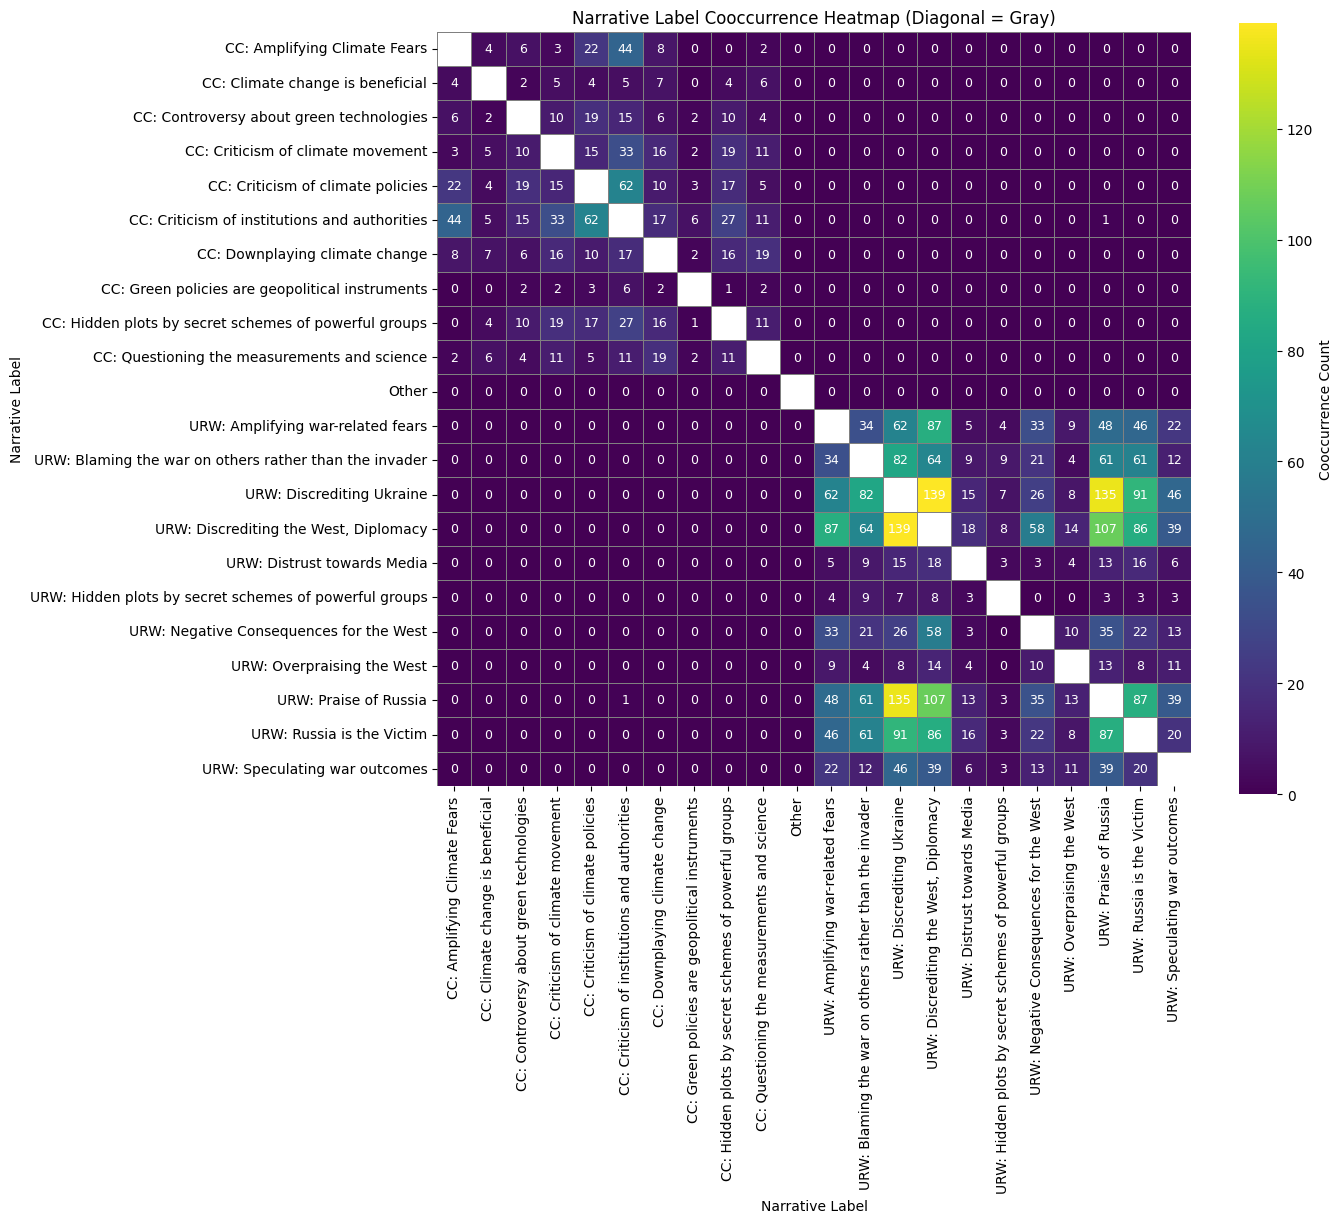

In [ ]:
# Compute the cooccurrence matrix for narrative labels
from itertools import combinations
import numpy as np

# Create a zero-filled DataFrame for cooccurrence
narratives_list = sorted(set(narr for sublist in df['narratives'] for narr in sublist))
cooccurrence_matrix = pd.DataFrame(0.0, index=narratives_list, columns=narratives_list)

# Count cooccurrences
for labels in df['narratives']:
    for a, b in combinations(sorted(set(labels)), 2):
        cooccurrence_matrix.loc[a, b] += 1
        cooccurrence_matrix.loc[b, a] += 1

# Set diagonal to NaN so it appears as gray in the heatmap
np.fill_diagonal(cooccurrence_matrix.values, np.nan)

plt.figure(figsize=(14, 12))
sns.heatmap(
    cooccurrence_matrix,
    annot=True,  # Show numbers
    fmt='.0f',   # No decimals
    cmap="viridis",  # Different color scheme
    square=True,
    mask=np.isnan(cooccurrence_matrix),
    cbar_kws={'label': 'Cooccurrence Count'},
    linewidths=0.5,
    linecolor='gray',
    annot=True,
)
plt.title('Narrative Label Cooccurrence Heatmap (Diagonal = Gray)')
plt.xlabel('Narrative Label')
plt.ylabel('Narrative Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()